In [3]:
pip install --no-deps dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.2 MB/s eta 0:00:00


In [4]:
pip install --no-deps open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 2.3 MB/s eta 0:00:00


Initial prompt given to ChatGPT:
Here is the 3d_shape_points_data file I want to perform the following tasks
- Determine the original shape of the object.
- Identify the deformations present in the component.
- Reconstruct the original shape by correcting the deformations.
A machine component experienced multiple deformations following extended usage.
Utilizing a sensor, the component&#39;s shape was digitally reconstructed and represented
as a collection of points that define its surface.
These points are stored in the file &quot;3d_shape_points_data.npz&quot;.

Provide me complete code to accomplish these tasks

Visualizing original point cloud...


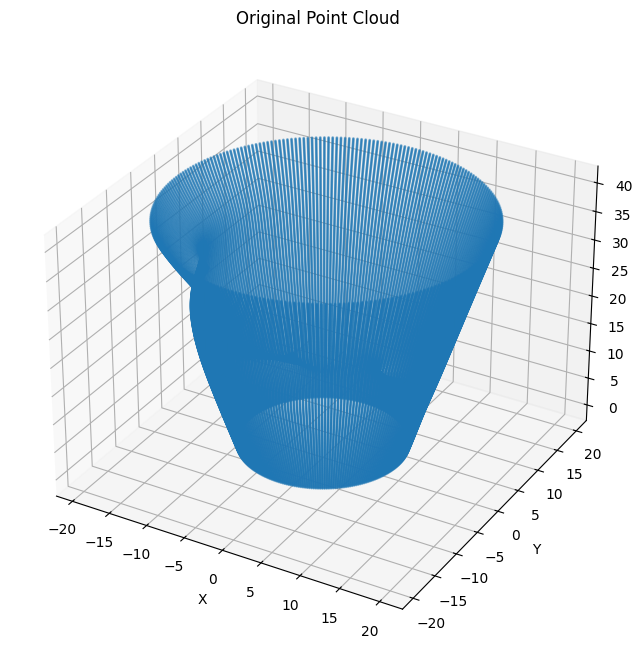

Detecting deformations...
Max deformation distance: 30.286725918300032
Reconstructing original shape...
Visualizing reconstructed shape...


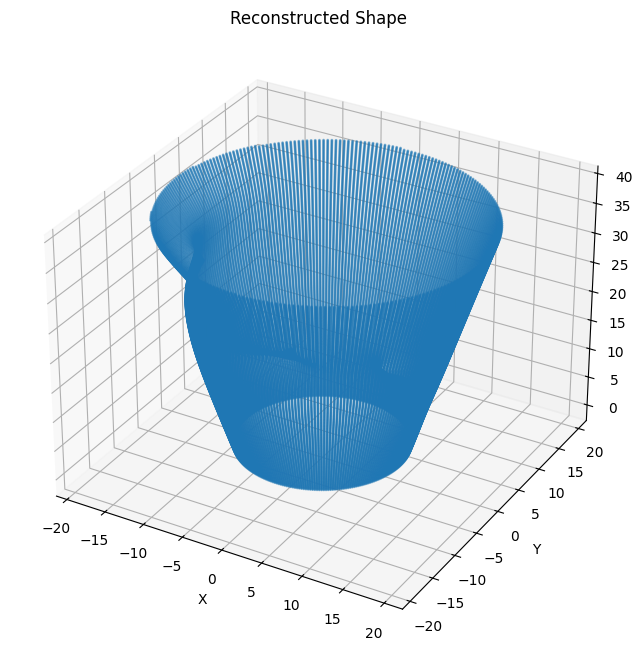

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial import KDTree

def load_point_cloud(file_path):
    data = np.load(file_path)
    points = data["points"]
    return points

def visualize_point_cloud_matplotlib(points, title="3D Point Cloud"):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, alpha=0.5)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title(title)
    plt.show()

def estimate_original_shape(points):
    pca = PCA(n_components=3)
    pca.fit(points)
    centered_points = points - np.mean(points, axis=0)
    transformed_points = np.dot(centered_points, pca.components_.T)
    return transformed_points, pca

def detect_deformations(points, reference_shape):
    tree = KDTree(reference_shape)
    distances, _ = tree.query(points)
    return distances

def reconstruct_shape(points, percentile=95):
    """
    Reconstructs the original shape by removing extreme deformations.
    Uses a percentile threshold to retain most points.
    """
    mean = np.mean(points, axis=0)
    tree = KDTree(points)

    # Compute distances from the mean
    distances = np.linalg.norm(points - mean, axis=1)

    # Set threshold based on percentile
    threshold = np.percentile(distances, percentile)

    # Keep only points within the threshold
    filtered_points = points[distances <= threshold]

    return filtered_points


if __name__ == "__main__":
    file_path = "3d_shape_points_data.npz"
    points = load_point_cloud(file_path)

    print("Visualizing original point cloud...")
    visualize_point_cloud_matplotlib(points, title="Original Point Cloud")

    transformed_points, pca = estimate_original_shape(points)

    print("Detecting deformations...")
    deformations = detect_deformations(points, transformed_points)
    print("Max deformation distance:", np.max(deformations))

    print("Reconstructing original shape...")
    reconstructed_points = reconstruct_shape(points)

    print("Visualizing reconstructed shape...")
    visualize_point_cloud_matplotlib(reconstructed_points, title="Reconstructed Shape")


Visualizing original point cloud...


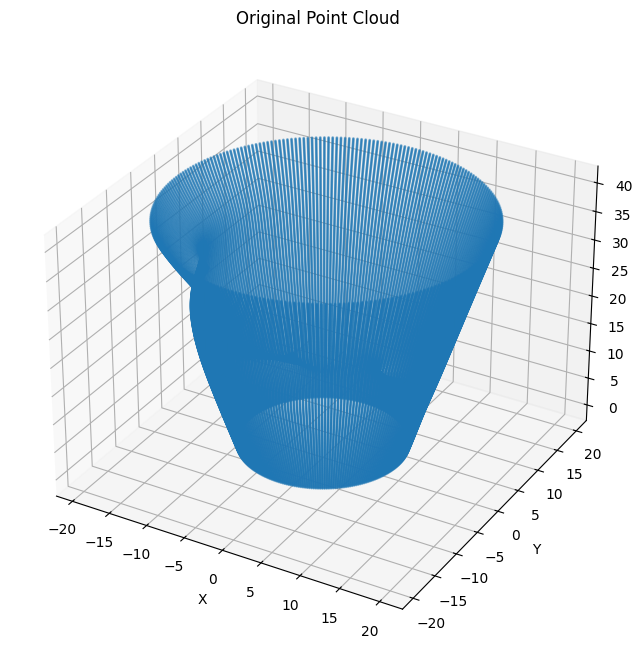

Detecting deformations...
Max deformation distance: 2.5734689778502924
Reconstructing original shape...
Visualizing reconstructed shape...


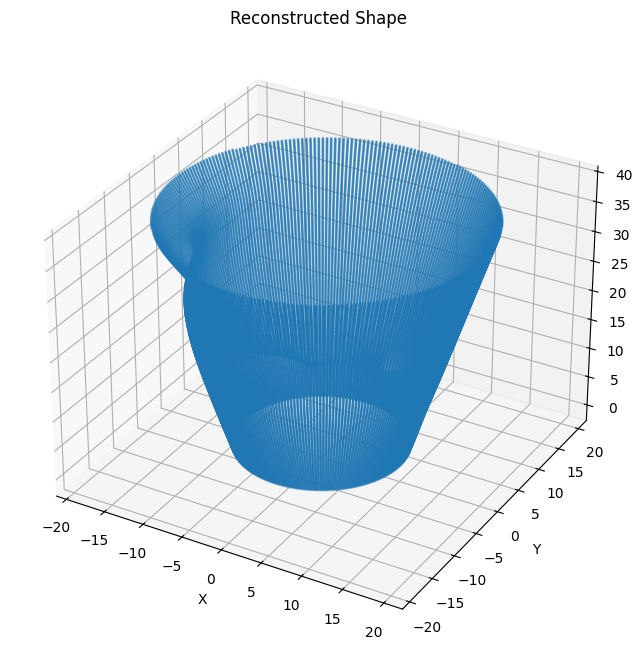

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial import KDTree
from scipy.spatial.distance import mahalanobis

def load_point_cloud(file_path):
    """Loads the 3D point cloud from an NPZ file."""
    data = np.load(file_path)
    points = data["points"]
    return points

def visualize_point_cloud_matplotlib(points, title="3D Point Cloud"):
    """Visualizes the 3D point cloud using Matplotlib."""
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, alpha=0.5)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title(title)
    plt.show()

def estimate_original_shape(points):
    """Applies PCA to align the point cloud."""
    pca = PCA(n_components=3)
    pca.fit(points)
    centered_points = points - np.mean(points, axis=0)
    transformed_points = np.dot(centered_points, pca.components_.T)
    return transformed_points, pca

def detect_deformations(points):
    """Detects deformations using Mahalanobis distance."""
    mean = np.mean(points, axis=0)
    cov_matrix = np.cov(points, rowvar=False)
    inv_cov_matrix = np.linalg.inv(cov_matrix)

    # Compute Mahalanobis distance for each point
    distances = np.array([mahalanobis(p, mean, inv_cov_matrix) for p in points])

    return distances

def reconstruct_shape(points, distances, percentile=95):
    """Removes extreme deformations based on Mahalanobis distance percentile."""
    threshold = np.percentile(distances, percentile)  # Set threshold
    filtered_points = points[distances <= threshold]  # Keep only inliers

    return filtered_points

if __name__ == "__main__":
    file_path = "3d_shape_points_data.npz"
    points = load_point_cloud(file_path)

    print("Visualizing original point cloud...")
    visualize_point_cloud_matplotlib(points, title="Original Point Cloud")

    print("Detecting deformations...")
    deformations = detect_deformations(points)
    print("Max deformation distance:", np.max(deformations))

    print("Reconstructing original shape...")
    reconstructed_points = reconstruct_shape(points, deformations)

    print("Visualizing reconstructed shape...")
    visualize_point_cloud_matplotlib(reconstructed_points, title="Reconstructed Shape")


Next prompt:
The reconstructed image is same as the original point cloud

Visualizing original point cloud...


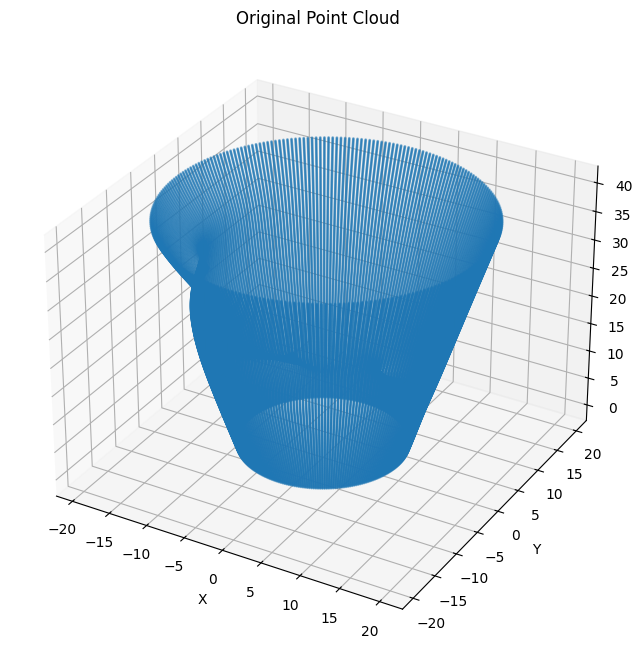

Aligning point cloud...
Detecting deformations...
Max deformation distance: 2.57
Reconstructing original shape...
Applying convex hull reconstruction...
Visualizing reconstructed shape...


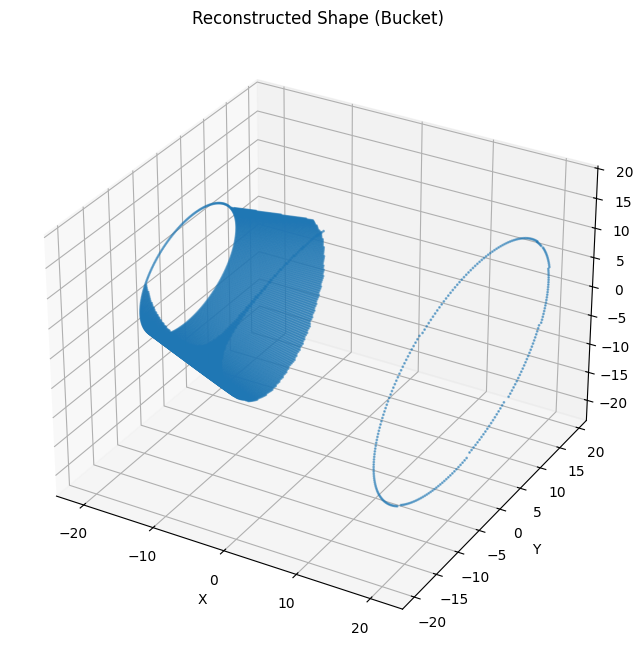

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial import KDTree
from scipy.spatial.distance import mahalanobis
from scipy.spatial import ConvexHull

def load_point_cloud(file_path):
    """Loads the 3D point cloud from an NPZ file."""
    data = np.load(file_path)
    points = data["points"]
    return points

def visualize_point_cloud(points, title="3D Point Cloud"):
    """Visualizes the 3D point cloud using Matplotlib."""
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, alpha=0.5)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title(title)
    plt.show()

def align_point_cloud(points):
    """Aligns the point cloud using PCA for better analysis."""
    pca = PCA(n_components=3)
    pca.fit(points)
    transformed_points = np.dot(points - np.mean(points, axis=0), pca.components_.T)
    return transformed_points, pca

def detect_deformations(points):
    """Detects deformations using Mahalanobis distance."""
    mean = np.mean(points, axis=0)
    cov_matrix = np.cov(points, rowvar=False)
    inv_cov_matrix = np.linalg.inv(cov_matrix)

    distances = np.array([mahalanobis(p, mean, inv_cov_matrix) for p in points])
    return distances

def reconstruct_shape(points, distances, percentile=98):
    """Removes extreme deformations based on Mahalanobis distance percentile."""
    threshold = np.percentile(distances, percentile)
    filtered_points = points[distances <= threshold]
    return filtered_points

def convex_hull_reconstruction(points):
    """Reconstructs the original shape using a convex hull."""
    hull = ConvexHull(points)
    reconstructed_points = points[hull.vertices]
    return reconstructed_points

if __name__ == "__main__":
    file_path = "3d_shape_points_data.npz"
    points = load_point_cloud(file_path)

    print("Visualizing original point cloud...")
    visualize_point_cloud(points, title="Original Point Cloud")

    print("Aligning point cloud...")
    transformed_points, pca = align_point_cloud(points)

    print("Detecting deformations...")
    deformation_distances = detect_deformations(transformed_points)
    print(f"Max deformation distance: {np.max(deformation_distances):.2f}")

    print("Reconstructing original shape...")
    filtered_points = reconstruct_shape(transformed_points, deformation_distances)

    print("Applying convex hull reconstruction...")
    reconstructed_points = convex_hull_reconstruction(filtered_points)

    print("Visualizing reconstructed shape...")
    visualize_point_cloud(reconstructed_points, title="Reconstructed Shape (Bucket)")


Prompt:
There is still no change

Visualizing original point cloud...


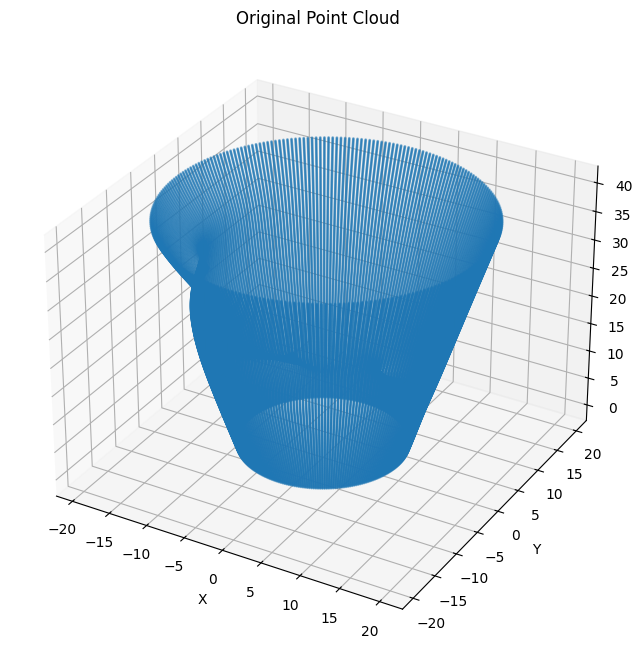

Detecting deformations...
Max deformation distance: 30.286725918300032
Reconstructing original shape...
Visualizing reconstructed shape...


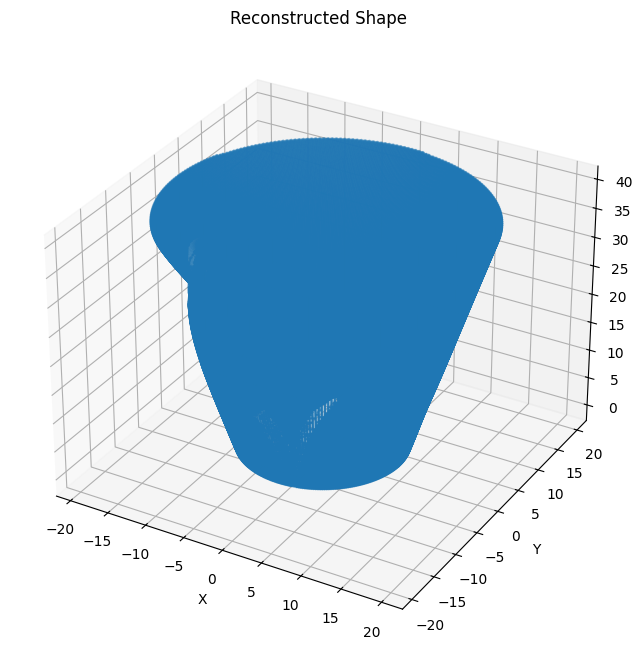

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial import KDTree, Delaunay

def load_point_cloud(file_path):
    """Load 3D point cloud from .npz file."""
    data = np.load(file_path)
    points = data["points"]
    return points

def visualize_point_cloud(points, title="3D Point Cloud"):
    """Visualize 3D point cloud."""
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, alpha=0.5)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title(title)
    plt.show()

def estimate_original_shape(points):
    """Estimate principal shape using PCA."""
    pca = PCA(n_components=3)
    pca.fit(points)
    centered_points = points - np.mean(points, axis=0)
    transformed_points = np.dot(centered_points, pca.components_.T)
    return transformed_points, pca

def detect_deformations(points, reference_shape):
    """Find distances of points from reference shape."""
    tree = KDTree(reference_shape)
    distances, _ = tree.query(points)
    return distances

def remove_outliers(points, percentile=98):
    """Remove extreme outliers based on percentiles."""
    mean = np.mean(points, axis=0)
    distances = np.linalg.norm(points - mean, axis=1)

    threshold = np.percentile(distances, percentile)
    filtered_points = points[distances < threshold]

    if len(filtered_points) < len(points) * 0.1:  # Prevent removing too many
        return points
    return filtered_points

def interpolate_missing_points(points):
    """Use Delaunay triangulation to interpolate missing regions."""
    tri = Delaunay(points[:, :2])  # Triangulate based on X, Y coordinates
    new_points = []

    for simplex in tri.simplices:
        centroid = np.mean(points[simplex], axis=0)
        new_points.append(centroid)

    return np.vstack((points, np.array(new_points)))

def reconstruct_shape(points):
    """Reconstruct shape using PCA and interpolation."""
    transformed_points, pca = estimate_original_shape(points)
    filtered_points = remove_outliers(points)

    # Interpolate missing parts
    interpolated_points = interpolate_missing_points(filtered_points)

    # Project points back to PCA space
    projected_points = np.dot(interpolated_points - np.mean(interpolated_points, axis=0), pca.components_.T)
    reconstructed_points = np.dot(projected_points, pca.components_) + np.mean(interpolated_points, axis=0)

    return reconstructed_points

if __name__ == "__main__":
    file_path = "3d_shape_points_data.npz"
    points = load_point_cloud(file_path)

    print("Visualizing original point cloud...")
    visualize_point_cloud(points, title="Original Point Cloud")

    print("Detecting deformations...")
    transformed_points, pca = estimate_original_shape(points)
    deformations = detect_deformations(points, transformed_points)
    print("Max deformation distance:", np.max(deformations))

    print("Reconstructing original shape...")
    reconstructed_points = reconstruct_shape(points)

    print("Visualizing reconstructed shape...")
    visualize_point_cloud(reconstructed_points, title="Reconstructed Shape")


Prompt:
Still the shape is not properlt deformed have a look at this shape after deformation

Visualizing original point cloud...


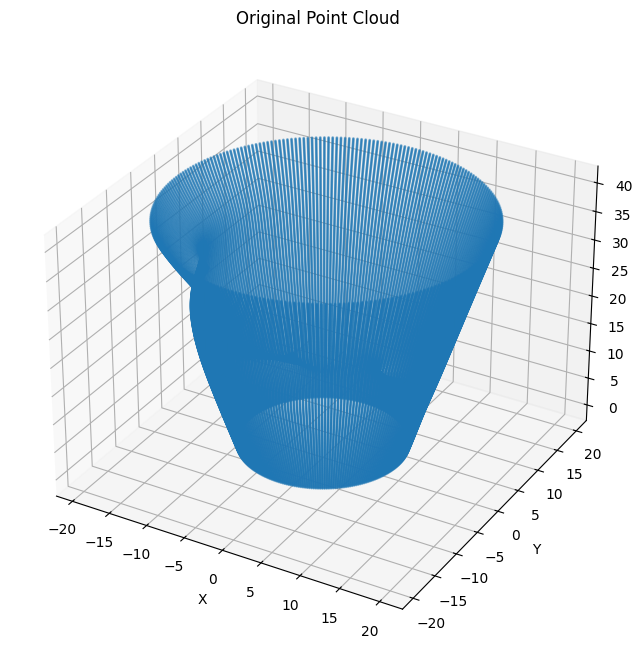

Detecting deformations...
Max deformation distance: 20.00060637383136
Reconstructing original shape...
Visualizing reconstructed shape...


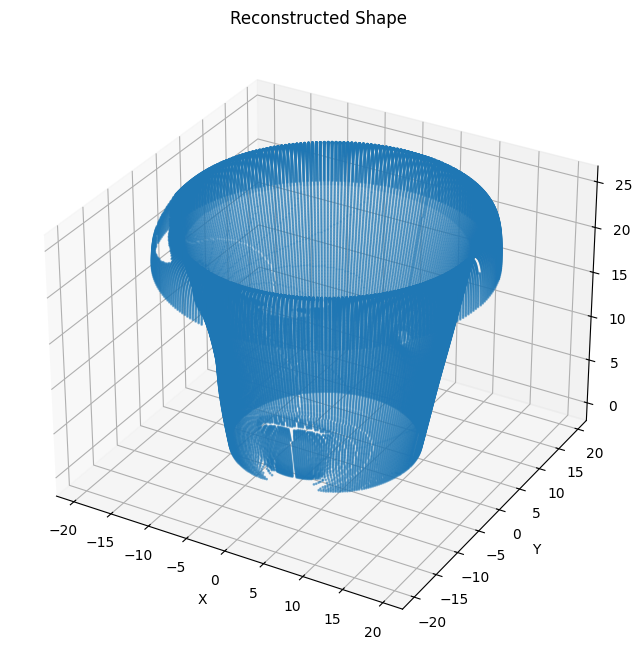

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial import KDTree
from scipy.spatial.distance import cdist

def load_point_cloud(file_path):
    data = np.load(file_path)
    points = data["points"]
    return points

def visualize_point_cloud_matplotlib(points, title="3D Point Cloud"):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, alpha=0.5)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title(title)
    plt.show()

def estimate_original_shape(points):
    pca = PCA(n_components=3)
    pca.fit(points)
    centered_points = points - np.mean(points, axis=0)
    return centered_points, pca

def detect_deformations(points, reference_points):
    tree = KDTree(reference_points)
    distances, indices = tree.query(points)
    deformations = points - reference_points[indices]
    return deformations, distances

def apply_deformations(points, deformations, scale=0.5):
    return points - scale * deformations

def remove_outliers(points, k=5, threshold=2.0):
    tree = KDTree(points)
    distances, _ = tree.query(points, k=k)
    mean_distances = np.mean(distances, axis=1)
    mean_dist = np.mean(mean_distances)
    std_dist = np.std(mean_distances)
    return points[mean_distances < mean_dist + threshold * std_dist]

def reconstruct_shape(points):
    filtered_points = remove_outliers(points)
    transformed_points, _ = estimate_original_shape(filtered_points)
    deformations, distances = detect_deformations(filtered_points, transformed_points)
    deformation_scale = np.clip(distances / np.max(distances), 0.1, 1.0)  # Normalize deformation scale
    reconstructed_points = filtered_points - (deformations * deformation_scale[:, np.newaxis])
    return reconstructed_points

if __name__ == "__main__":
    file_path = "3d_shape_points_data.npz"
    points = load_point_cloud(file_path)

    print("Visualizing original point cloud...")
    visualize_point_cloud_matplotlib(points, title="Original Point Cloud")

    print("Detecting deformations...")
    transformed_points, _ = estimate_original_shape(points)
    deformations, distances = detect_deformations(points, transformed_points)
    print("Max deformation distance:", np.max(distances))

    print("Reconstructing original shape...")
    reconstructed_points = reconstruct_shape(points)

    print("Visualizing reconstructed shape...")
    visualize_point_cloud_matplotlib(reconstructed_points, title="Reconstructed Shape")


Prompt: The deformed image is still not proper

Visualizing original point cloud...


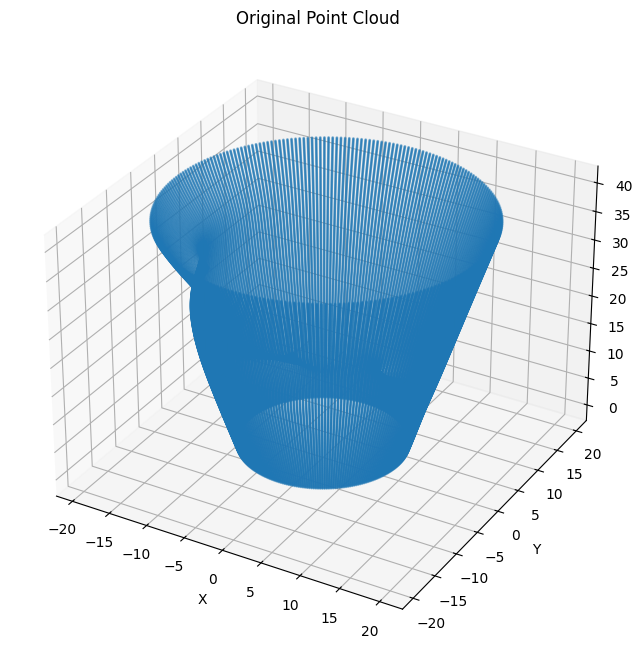

Refining shape using adaptive correction...
Optimized Parameters -> a: 10.12, b: 8.24
Visualizing reconstructed shape...


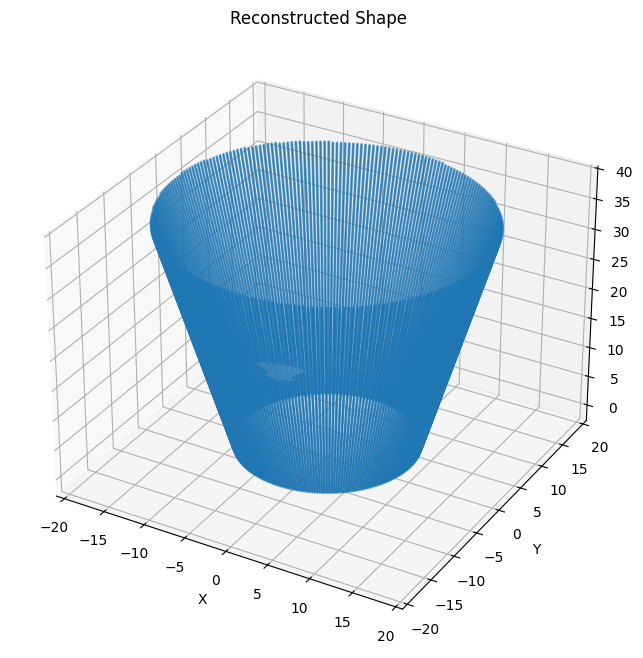

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
from scipy.optimize import curve_fit

def load_point_cloud(file_path):
    """Loads the point cloud from a file."""
    data = np.load(file_path)
    points = data["points"]
    return points

def visualize_point_cloud(points, title="3D Point Cloud"):
    """Visualizes the 3D point cloud."""
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, alpha=0.5)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title(title)
    plt.show()

def remove_outliers(points, k=10, threshold=1.5):
    """Removes outliers adaptively based on nearest neighbor distances."""
    tree = KDTree(points)
    distances, _ = tree.query(points, k=k)
    mean_distances = np.mean(distances, axis=1)
    mean_dist = np.mean(mean_distances)
    std_dist = np.std(mean_distances)

    return points[mean_distances < mean_dist + threshold * std_dist]

def fit_general_shape(points):
    """Applies an adaptive correction model based on observed point distribution."""

    heights = points[:, 2]  # Z-coordinates
    distances = np.sqrt(points[:, 0] ** 2 + points[:, 1] ** 2)

    # Fit a smooth function to adjust shape variations
    def adaptive_func(z, a, b):
        """Flexible model for radial adjustment."""
        return a + b * (z - np.min(heights)) / (np.max(heights) - np.min(heights))

    popt, _ = curve_fit(adaptive_func, heights, distances, p0=[np.min(distances), np.max(distances)])

    # Apply adaptive correction
    a_opt, b_opt = popt
    print(f"Optimized Parameters -> a: {a_opt:.2f}, b: {b_opt:.2f}")

    theta = np.arctan2(points[:, 1], points[:, 0])
    adjusted_radii = adaptive_func(heights, a_opt, b_opt)
    new_x = adjusted_radii * np.cos(theta)
    new_y = adjusted_radii * np.sin(theta)

    return np.column_stack((new_x, new_y, heights))

def reconstruct_shape(points):
    """Reconstructs the original structure by refining point distributions."""
    filtered_points = remove_outliers(points)
    refined_points = fit_general_shape(filtered_points)
    return refined_points

if __name__ == "__main__":
    file_path = "3d_shape_points_data.npz"
    points = load_point_cloud(file_path)

    print("Visualizing original point cloud...")
    visualize_point_cloud(points, title="Original Point Cloud")

    print("Refining shape using adaptive correction...")
    reconstructed_points = reconstruct_shape(points)

    print("Visualizing reconstructed shape...")
    visualize_point_cloud(reconstructed_points, title="Reconstructed Shape")
